# Day 3 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of F02-1_logs.las well from the data folder
## Perform the below Tasks:

>1. Plot well logs using matplotlib for every well-log in the las file
2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. Calculate the VP log from the DT sonic curve.
4. Calculate the VP log using AI and RHOB log.
5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes? 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio

In [2]:
# read las file
F02 = lasio.read("Dutch_F3_Logs\F02-1_logs.las")
# Into dataframe
df = F02.df()
# Curves?
print ('curves: ', F02.keys())

curves:  ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']


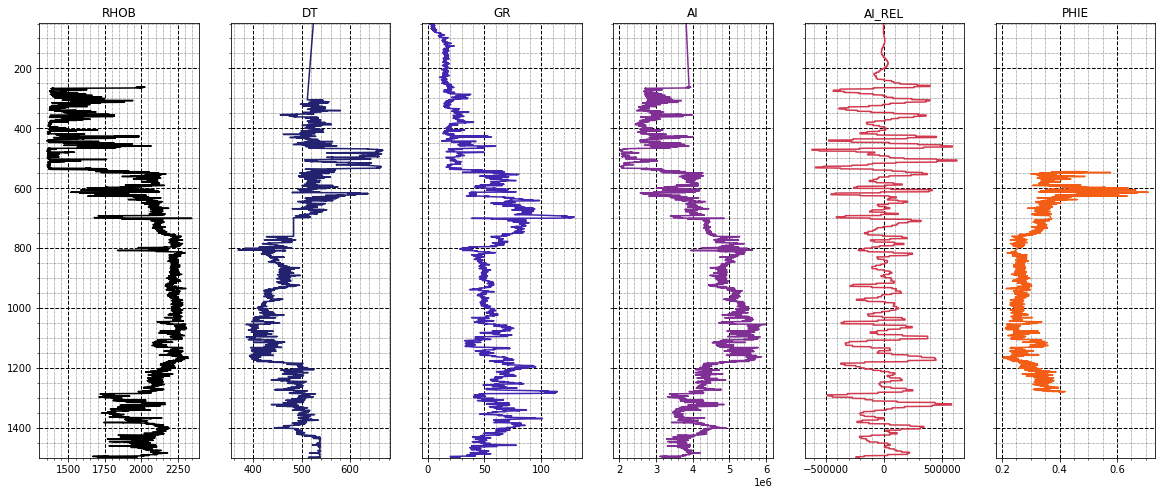

In [3]:
#1. Plot well logs using matplotlib for every well-log in the las file

import matplotlib as mpl

rows, cols = 1, df.shape[1]

cmap = mpl.cm.CMRmap

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,8), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black']
for i in range(cols):
    ax[i].plot(df.iloc[:,i], df.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df.index), min(df.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
    ax[i].set_title('%s' %names[i])

In [4]:
#2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
df.dropna()
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
10%,1411.147920,425.138300,15.690850,2.767478e+06,-229566.687500,0.244350
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
90%,2246.447220,537.536420,76.239350,5.244555e+06,244738.265600,0.371300
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


In [5]:
#3. Calculate the VP log from the DT sonic curve.
df['VP'] = 1000000/df['DT']
df.VP

DEPTH
48.0000      1908.220327
48.1500      1908.247637
48.3000      1908.274584
48.4500      1908.301531
48.6000      1908.327751
                ...     
1499.2500    1879.089251
1499.4000    1869.644637
1499.5500    1861.538055
1499.7001    1861.285813
1499.8501    1860.869834
Name: VP, Length: 9680, dtype: float64

In [6]:
#4. Calculate the VP log using AI and RHOB log.
df['VP_2']= df['AI']/df['RHOB']
df.VP_2

DEPTH
48.0000              NaN
48.1500              NaN
48.3000              NaN
48.4500              NaN
48.6000              NaN
                ...     
1499.2500    1879.120317
1499.4000    1869.600800
1499.5500    1861.533886
1499.7001    1861.285814
1499.8501    1860.873172
Name: VP_2, Length: 9680, dtype: float64

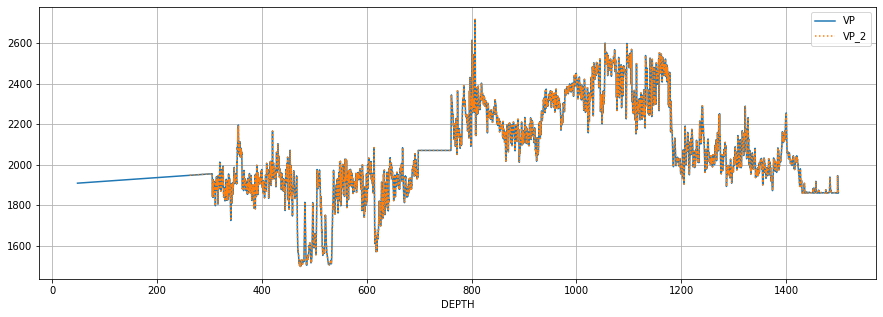

In [7]:
#5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?
df.VP.plot(figsize=(15,5), grid=True, legend=True);
df.VP_2.plot(figsize=(15,5),linestyle='dotted', grid=True, legend=True);